## Analise da real_data das amostras:
* **Pontos** para analíse:

    Controlo são padrões de fenois ou polifenois e devem servir para ao comparar comos picos da amostra perceber quais deles são (poli)fenois ; 

    O Blank serve para provar quais os picos não são do solvente mas sim dos compostos em analíse;



In [ ]:
from hplc.io import load_chromatogram
from hplc.quant import Chromatogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as 

[<Figure size 640x480 with 1 Axes>, <Axes: xlabel='time', ylabel='signal'>]

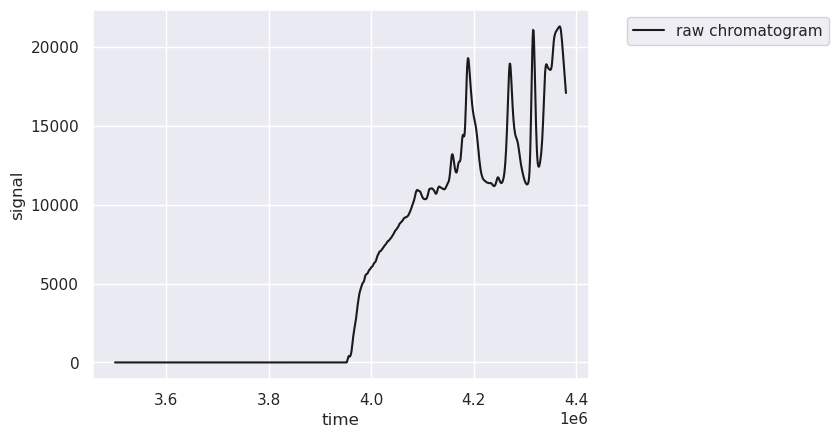

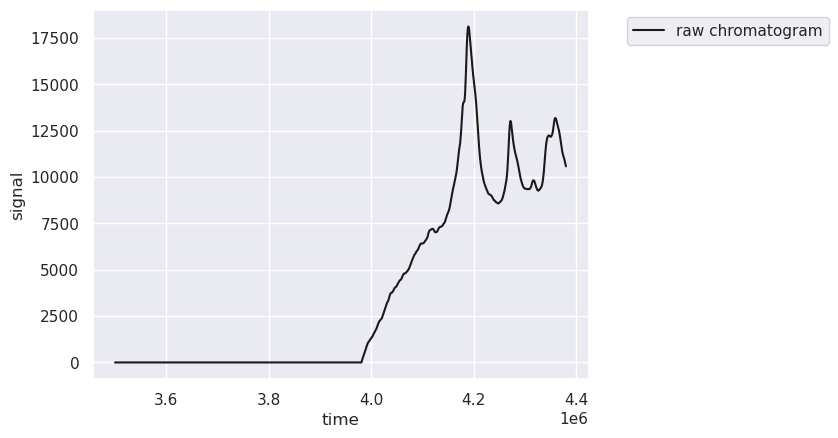

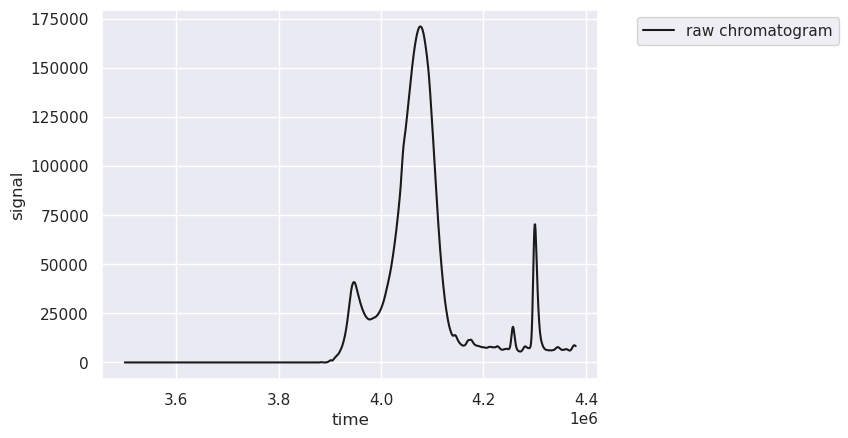

In [126]:
control1 = load_chromatogram('Data_PolyFoxScreen_CSV/Control/C_1_160424.csv', cols={'RT(milliseconds)':'time', 'TIC': 'signal' }, delimiter=',')
control_chromatogram1 = Chromatogram(control1, cols={'time': 'time', 'signal': 'signal'})
control_chromatogram1.crop([3.5e6,5e6])
control_chromatogram1.show()

control_chromatogram1_teste = Chromatogram(control1, cols={'time': 'time', 'signal': 'signal'})
control_chromatogram1_teste.crop([3.5e6,5e6])





control2 = load_chromatogram('Data_PolyFoxScreen_CSV/Control/C_2_160424.csv', cols={'RT(milliseconds)':'time', 'TIC': 'signal' }, delimiter=',')
control_chromatogram2 = Chromatogram(control2, cols={'time': 'time', 'signal': 'signal'})
control_chromatogram2.crop([3.5e6,5e6])
control_chromatogram2.show()

blank = load_chromatogram('Data_PolyFoxScreen_CSV/Control/Blank_20092023.csv', cols={'RT(milliseconds)':'time', 'TIC': 'signal' }, delimiter=',')
blank_chromatogram = Chromatogram(blank, cols={'time': 'time', 'signal': 'signal'})
blank_chromatogram.crop([3.5e6,5e6])
blank_chromatogram.show()


Control 1 peaks:


Deconvolving mixture: 100%|██████████| 20/20 [00:24<00:00,  1.20s/it]


   retention_time        scale          skew      amplitude         area  \
0     3987984.525   484.352030     92.486598   35530.059511    72.818484   
0     3990400.614   617.394906  -3852.364531   44948.876353    85.190237   
0     4005589.569   276.983690     57.951182    3154.091140     9.072969   
0     4015200.917   213.094645  -2121.197065    8450.621557    31.668229   
0     4029610.763  2674.963195   -801.712043    7316.800425    10.206702   
0     4036004.315  2484.790586  -2013.942841   13401.592588    18.879642   
0     4041600.717   364.131032  -1528.445826    5818.178100    13.869151   
0     4054400.876    83.294337  -2839.936994    4758.151460    45.576275   
0     4063199.107    80.273564    489.565235    9394.852645    93.374993   
0     4083204.528  1131.881115   -841.494244   11792.563196    18.848866   
0     4091213.590  5545.002062   -788.590346    8430.164941    11.091340   
0     4113598.553  4298.912212  11465.134965   17307.595327    23.234675   
0     413359

Deconvolving mixture: 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


   retention_time        scale         skew      amplitude          area  \
0     3901599.712    39.535171 -2747.216856   81845.429542  2.336100e-86   
0     3909587.932   251.572677  -908.142360   47975.819009  1.127657e+00   
0     3943974.013    74.485029   764.105300  505689.630801  5.097095e+03   
0     4064794.319  1601.994573   884.598303  413379.566753  6.180601e+02   
0     4066407.200  8848.483342 -4644.027318  458935.822988  5.939859e+02   
0     4144799.167   129.392991  4608.323820  123808.962221  7.634356e+02   
0     4172000.997  2673.242832 -9931.124177  112397.689396  1.572258e+02   
0     4228795.365   865.138601   648.527392   70453.296550  1.201894e+02   
0     4258398.277    23.860094    47.306938  237489.194408  7.918474e+03   
0     4280757.436    62.311716   160.768071  117257.817477  1.189024e+03   
0     4301599.112    57.396138   440.523491  941606.009856  1.308804e+04   
0     4344798.448    78.858787   432.583943   87619.661499  8.863544e+02   
0     437440

[<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='time', ylabel='signal (baseline corrected)'>]

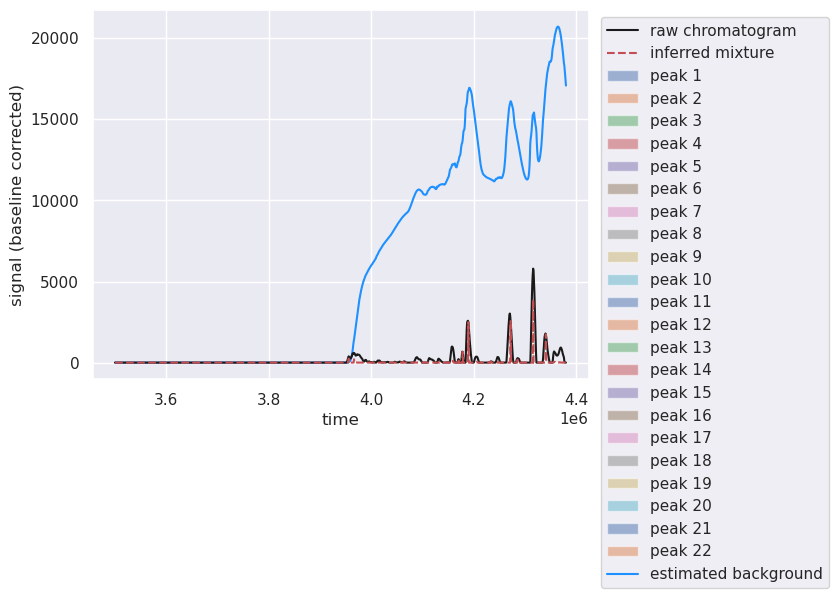

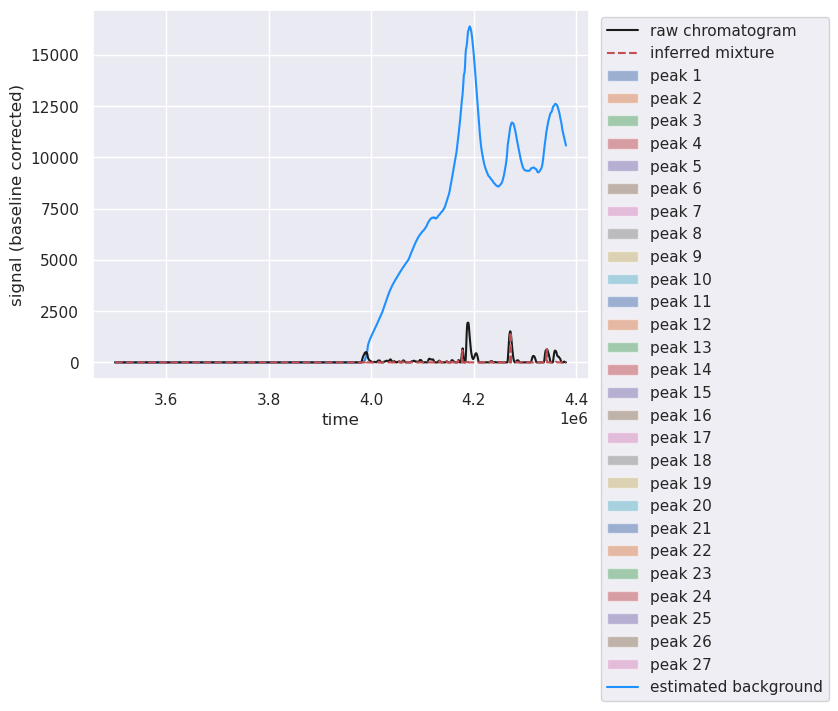

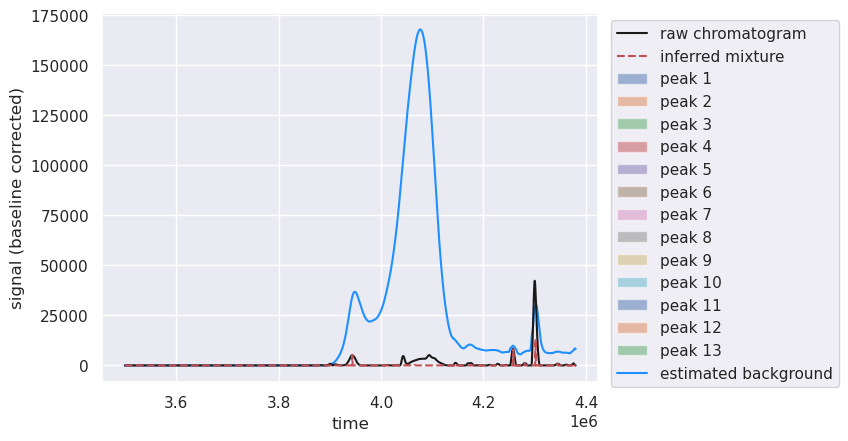

In [128]:
print("Control 1 peaks:")

peaks_control1 = control_chromatogram1.fit_peaks(approx_peak_width=0.01e6)
# print(peaks_control1)
control_chromatogram1.show()



# print("Control 2 peaks:")
peaks_control2 = control_chromatogram2.fit_peaks(approx_peak_width=0.01e6)
print(peaks_control2)
control_chromatogram2.show()


print("Blank peaks:")
peaks_blank = blank_chromatogram.fit_peaks(approx_peak_width=0.01e6)
print(peaks_blank)
blank_chromatogram.show()



In [ ]:
picos_fenol = pd.concat([peaks_control1, peaks_control2], ignore_index=True)
picos_fenol = picos_fenol.sort_values(by='retention_time').reset_index(drop=True)
picos_fenol['fenol'] = range(1, len(picos_fenol) + 1)
print(picos_fenol)

"""
O data frame "picos_fenol" contem todos os picos quantifficados (de fenol) detetados nos cromatogramas de controlo

"""



    retention_time        scale          skew      amplitude           area  \
0      3955998.830    93.229477    720.745978   28573.456392   2.445206e+02   
1      3966399.890   220.874469   9727.121031   55931.254373   2.023311e+02   
2      3972784.373  3286.638496   -901.638638   39647.945829   4.493457e+01   
3      3987984.525   484.352030     92.486598   35530.059511   7.281848e+01   
4      3989593.250    22.261901   -726.548551   11850.361165  8.318144e-274   
5      3990400.614   617.394906  -3852.364531   44948.876353   8.519024e+01   
6      4005589.569   276.983690     57.951182    3154.091140   9.072969e+00   
7      4012799.668   535.278081   7467.392120   11920.297412   2.378308e+01   
8      4015200.917   213.094645  -2121.197065    8450.621557   3.166823e+01   
9      4029610.763  2674.963195   -801.712043    7316.800425   1.020670e+01   
10     4036004.315  2484.790586  -2013.942841   13401.592588   1.887964e+01   
11     4041600.717   364.131032  -1528.445826    581

'\nO data frame "picos_fenol" contem todos os 14 picos quantifficados (de fenol) detetados nos cromatogramas de controlo\n\n'

**Check point** 

**ate agora:**

quantificar os picos nas cromatografias dos grupos controlo e blank

identificar os tipos de fenol nos grupos controlo

dataframe com todos os tipos de fenol (nao sei se esta afirmacao esta quimicamente correta mas acho que os grupos controlo contem os fenois que possivelmente estao presentes nas amostras de pure)


**proximos passos** :

identificar picos de fenol/polifenol

processar dados da apple e da pear

procurar picos de fenol e polifenol nos dados da apple e pear




Performing baseline correction:   0%|          | 0/5 [00:00<?, ?it/s]

Deconvolving mixture: 100%|██████████| 52/52 [02:42<00:00,  3.13s/it]

   retention_time        scale          skew     amplitude          area  \
0      368972.533  5593.261189   -409.796437  2.166591e+06   2796.167941   
0      375199.338   540.797523   3124.009863  4.283087e+06   8510.218406   
0      399999.685    33.661388   1055.438921  2.600130e+06  61628.848892   
0      409599.463    35.346158    289.022724  2.123393e+05   4792.647926   
0      424801.564  1793.249746  -4391.644549  1.586229e+06   2334.271636   
0      427619.911  2781.717456  -2697.103337  4.836992e+05    601.158878   
0      467997.297    42.017125     61.977472  5.234677e+05   9919.515945   
0      495999.313    63.320169    944.212448  5.324479e+06  67088.722683   
0      509599.770    75.077397   3612.910288  4.542739e+05   4827.770019   
0      529599.539    58.000057    476.721632  1.907807e+05   2624.218935   
0      582399.728    25.510053    473.243117  9.107263e+05  28483.399120   
0      671999.662    33.199017    768.346929  1.865014e+06  44820.267033   
0      70159

[<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='time', ylabel='signal (baseline corrected)'>]

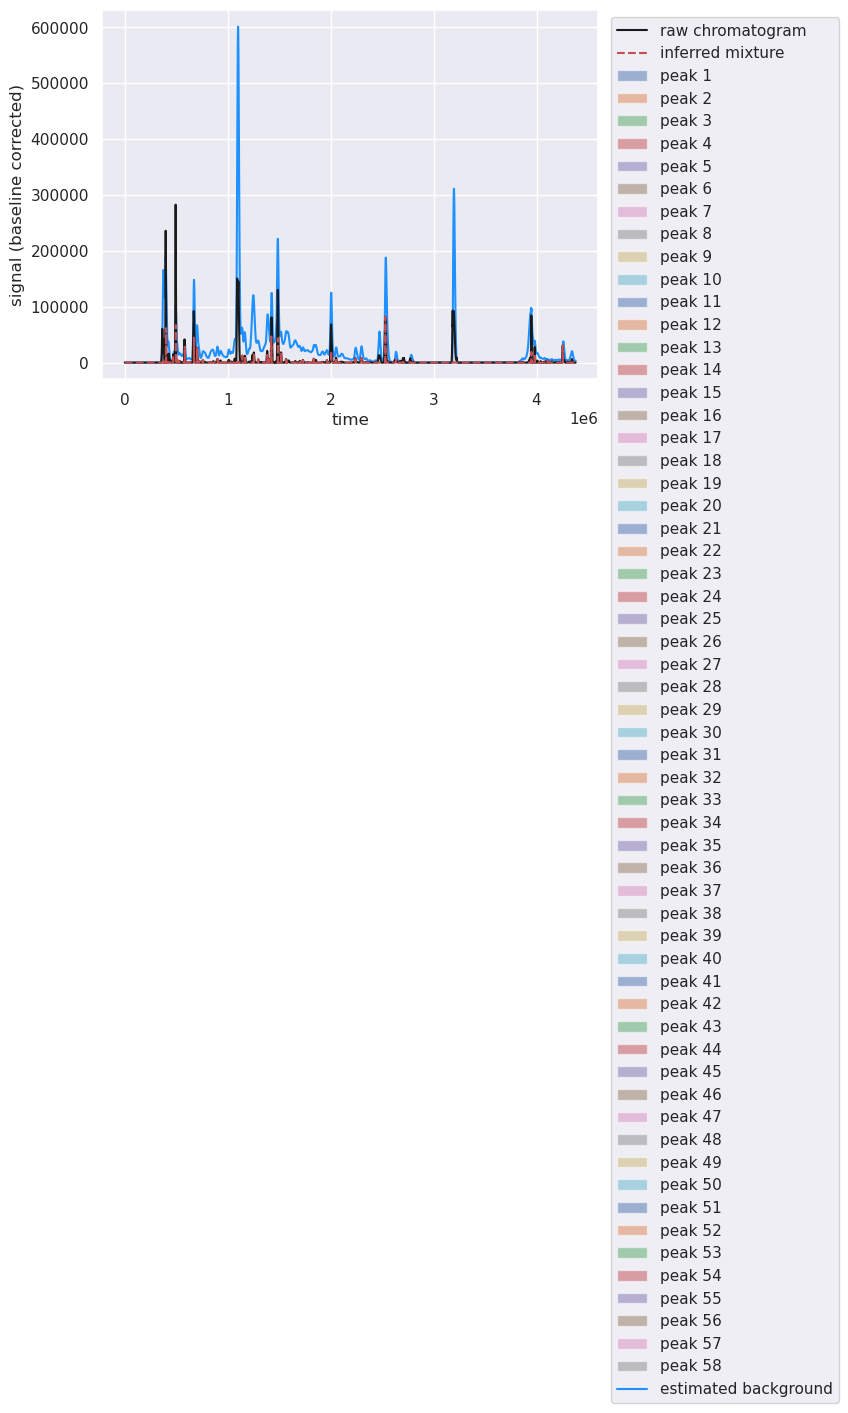

In [131]:
amostra1 = load_chromatogram('Data_PolyFoxScreen_CSV/Apple/RNS01_1.csv', cols={'RT(milliseconds)':'time', 'TIC': 'signal' }, delimiter=',')
cromatograma_amostra1 = Chromatogram(amostra1, cols={'time': 'time', 'signal': 'signal'})
dados_picos_amostra1 = cromatograma_amostra1.fit_peaks(approx_peak_width=0.01e6,correct_baseline=True)
print(dados_picos_amostra1)
cromatograma_amostra1.show()


In [132]:
rt_picos_amostra1 = dados_picos_amostra1['retention_time']
area_picos_amostra1 = dados_picos_amostra1['area']
picos_fenol_amostra1 = {} 
desvio_padrao = picos_fenol['retention_time'].std()

for index, row in picos_fenol.iterrows():
    rt_referencia = row['retention_time']
    area_referencia = row['area']
    for i, rt in enumerate(rt_picos_amostra1):
        if abs(rt - rt_referencia) < desvio_padrao:
            picos_fenol_amostra1[i] = row['fenol']
            

print(picos_fenol_amostra1)
for i,fenol in picos_fenol_amostra1.items():
    print(f"O pico {i+1} presente no cromatograma da amostra 1 corresponde ao tipo de fenol {int(fenol)} com RT {rt_picos_amostra1.iloc[i]} e area {area_picos_amostra1.iloc[i]}")


{51: np.float64(14.0), 52: np.float64(15.0), 53: np.float64(18.0), 54: np.float64(20.0), 55: np.float64(33.0), 56: np.float64(49.0), 57: np.float64(49.0)}
O pico 52 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 14 com RT 3938401.614 e area 1150.416877873277
O pico 53 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 15 com RT 3950399.521 e area 19109.140718303668
O pico 54 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 18 com RT 3983199.542 e area 12141.696176289162
O pico 55 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 20 com RT 4007998.208 e area 509.5060003914138
O pico 56 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 33 com RT 4105599.088 e area 3330.185274795132
O pico 57 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 49 com RT 4254352.208 e area 30667.863438079825
O pico 58 presente no cromatograma da amostra 1 corresponde ao tipo de fenol 49 com RT 4348795.273